In [1]:
import numpy as np
import pandas as pd
import geopandas as gpd
import xarray as xr
import rioxarray as rxr
import matplotlib.pyplot as plt
from odc.geo.xr import ODCExtensionDa, assign_crs, xr_reproject

In [3]:
AVHRR = xr.open_zarr(
    "/scicore/home/meiera/schulz0022/projects/growth-and-temperature/data_nobackup/glass/LST/AVHRR/0.05D/processed/stage_2/avhrr_timeseries_reprojected.zarr",
    consolidated=False,
    decode_coords="all"
)

AVHRR_subset = AVHRR["median"].rio.write_crs(4326).rio.clip_box(7,47,8,48).compute()

In [3]:
AVHRR_raw = xr.open_zarr(
    "/scicore/home/meiera/schulz0022/projects/growth-and-temperature/data_nobackup/glass/LST/AVHRR/0.05D/processed/stage_1/1992.zarr",
    consolidated=False, decode_coords="all"
)
AVHRR_raw_subset = AVHRR_raw["median"].rio.clip_box(7,47,8,48, crs=4326).compute()

In [2]:
MODIS = xr.open_zarr(
    "/scicore/home/meiera/schulz0022/projects/growth-and-temperature/data_nobackup/glass/LST/MODIS/Daily/1KM/processed/stage_2/modis_timeseries_reprojected.zarr",
    consolidated=False
)

MODIS_subset = MODIS["median"].rio.write_crs(4326).rio.clip_box(7,47,8,48).compute()

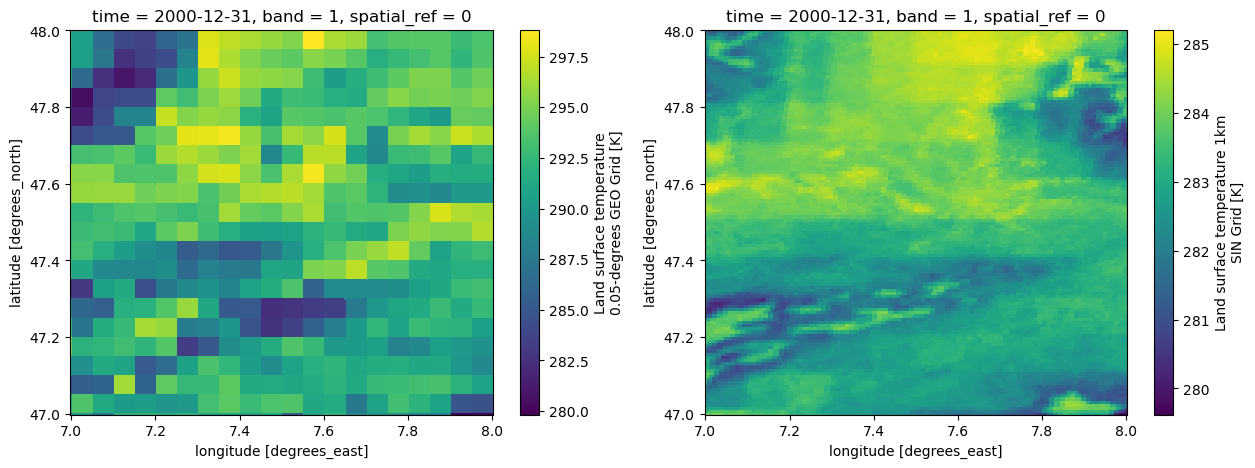

In [6]:
fix, ax = plt.subplots(1, 2, figsize=(15,5))

AVHRR_subset.sel(time="2000-12-31").squeeze().plot.imshow(ax=ax[0])
MODIS_subset.sel(time="2000-12-31").squeeze().plot.imshow(ax=ax[1])

In [ ]:
NTLHARM = xr.open_zarr(
    "/scicore/home/meiera/schulz0022/projects/growth-and-temperature/data_nobackup/ntl_harm/harmonized/processed/stage_2/ntl_harm_timeseries_reprojected.zarr",
    consolidated=False,
    decode_coords="all"
)

NTLHARM_subset = NTLHARM["ntl_harm"].rio.write_crs(4326).rio.clip_box(7,47,8,48).compute()

In [75]:
VIIRS = xr.open_zarr(
    "/scicore/home/meiera/schulz0022/projects/growth-and-temperature/data_nobackup/eog/viirs/processed/stage_2/viirs_annual_timeseries_reprojected.zarr",
    consolidated=False,
    decode_coords="all"
)

VIIRS_subset = VIIRS["viirs_annual"].rio.write_crs(4326).rio.clip_box(7,47,8,48).compute()

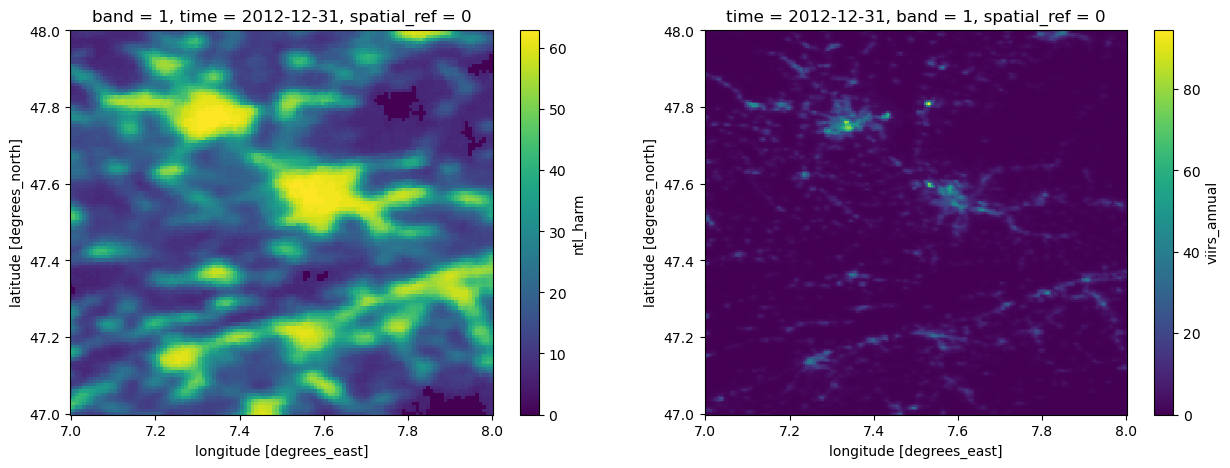

In [76]:
fix, ax = plt.subplots(1, 2, figsize=(15,5))

NTLHARM_subset.sel(time="2012-12-31").squeeze().plot.imshow(ax = ax[0])
VIIRS_subset.sel(time="2012-12-31").squeeze().plot.imshow(ax = ax[1])

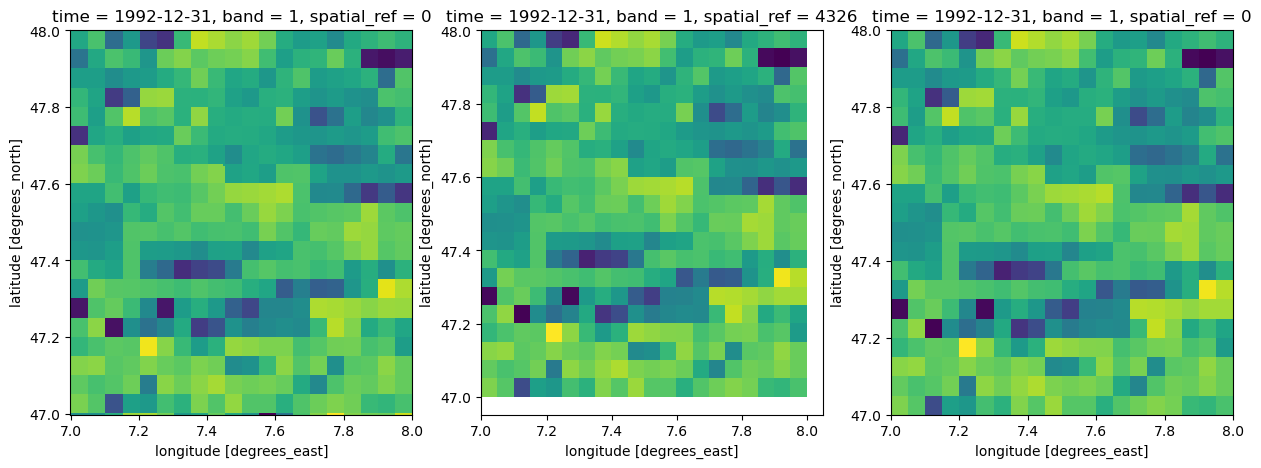

In [80]:
fix, ax = plt.subplots(1, 3, figsize=(15,5))

res = 0.05

AVHRR_subset.isel(time=0).squeeze().plot.imshow(ax=ax[0], add_colorbar=False)
AVHRR_subset.isel(time=0).odc.reproject(MODIS_subset.odc.geobox.zoom_to(resolution=res), resampling = "mode", dst_nodata = np.nan).squeeze().plot.imshow(ax=ax[1], add_colorbar=False)
AVHRR_raw_subset.squeeze().plot.imshow(ax=ax[2], add_colorbar=False)

In [81]:
np.array([
    AVHRR_subset.isel(time=0).isnull().mean().values,
    AVHRR_subset.isel(time=0).odc.reproject(MODIS_subset.odc.geobox.zoom_to(resolution=res), resampling = "mode", dst_nodata = np.nan).isnull().mean().values,
    AVHRR_raw_subset.isnull().mean().values
    ])

array([0.        , 0.09297052, 0.        ])

In [97]:
MODIS_subset.isel(time=0).odc.reproject(MODIS_subset.odc.geobox.pad_wh(-100), resampling = "mode", dst_nodata = np.nan)

<xarray.DataArray (band: 1, latitude: 200, longitude: 200)> Size: 320kB
array([[[281.20999146, 281.20999146, 281.20999146, ..., 284.57998657,
         284.48001099, 284.48001099],
        [281.20999146, 281.20999146, 281.20999146, ..., 284.48001099,
         284.48001099, 284.48001099],
        [281.6000061 , 281.6000061 , 281.6000061 , ..., 284.47000122,
         284.47000122, 284.47000122],
        ...,
        [283.35998535, 282.41000366, 282.41000366, ..., 282.98001099,
         282.8999939 , 282.8999939 ],
        [282.3500061 , 281.3999939 , 281.3999939 , ..., 282.69000244,
         282.76000977, 282.76000977],
        [281.3999939 , 281.3999939 , 281.3999939 , ..., 282.76000977,
         282.76000977, 282.76000977]]], shape=(1, 200, 200))
Coordinates:
    time         datetime64[ns] 8B 2000-12-31
  * band         (band) int64 8B 1
  * latitude     (latitude) float64 2kB 48.0 48.0 47.99 ... 47.18 47.17 47.17
  * longitude    (longitude) float64 2kB 7.0 7.004 7.008 ... 7.821 7.826 7.83
    spatial_ref  int32 4B 4326
Attributes: (12/43)
    ASSOCIATEDINSTRUMENTSHORTNAME.1:  MODIS
    ASSOCIATEDPLATFORMSHORTNAME.1:    Terra
    ASSOCIATEDSENSORSHORTNAME.1:      MODIS
    BANDDEFINITION:                   END_OBJECT
    CHARACTERISTICBINSIZE:            926.6
    DATACOLUMNS:                      1200
    ...                               ...
    VERSIONID:                        1
    VERTICALTILENUMBER:               4
    WEBSITE:                          http://glass-product.bnu.edu.cn
    WESTHBOUNDINGCOORDINATE:          -13.025755
    long_name:                        Land surface temperature 1km SIN Grid
    units:                            K

In [103]:
MODIS

<xarray.Dataset> Size: 4TB
Dimensions:      (time: 21, band: 1, latitude: 33601, longitude: 86401)
Coordinates:
  * time         (time) datetime64[ns] 168B 2000-12-31 2001-12-31 ... 2020-12-31
  * latitude     (latitude) float64 269kB 75.0 75.0 74.99 ... -64.99 -65.0 -65.0
  * longitude    (longitude) float64 691kB -180.0 -180.0 -180.0 ... 180.0 180.0
  * band         (band) int64 8B 1
Data variables:
    min          (time, band, latitude, longitude) float64 488GB dask.array<chunksize=(1, 1, 512, 512), meta=np.ndarray>
    spatial_ref  int64 8B ...
    median       (time, band, latitude, longitude) float64 488GB dask.array<chunksize=(1, 1, 512, 512), meta=np.ndarray>
    lt0C         (time, band, latitude, longitude) float32 244GB dask.array<chunksize=(1, 1, 512, 512), meta=np.ndarray>
    max          (time, band, latitude, longitude) float64 488GB dask.array<chunksize=(1, 1, 512, 512), meta=np.ndarray>
    rollmin3     (time, band, latitude, longitude) float64 488GB dask.array<chunksize=(1, 1, 512, 512), meta=np.ndarray>
    gt30C        (time, band, latitude, longitude) float32 244GB dask.array<chunksize=(1, 1, 512, 512), meta=np.ndarray>
    std          (time, band, latitude, longitude) float64 488GB dask.array<chunksize=(1, 1, 512, 512), meta=np.ndarray>
    mean         (time, band, latitude, longitude) float64 488GB dask.array<chunksize=(1, 1, 512, 512), meta=np.ndarray>
    rollmax3     (time, band, latitude, longitude) float64 488GB dask.array<chunksize=(1, 1, 512, 512), meta=np.ndarray>
    valid_count  (time, band, latitude, longitude) float32 244GB dask.array<chunksize=(1, 1, 512, 512), meta=np.ndarray>

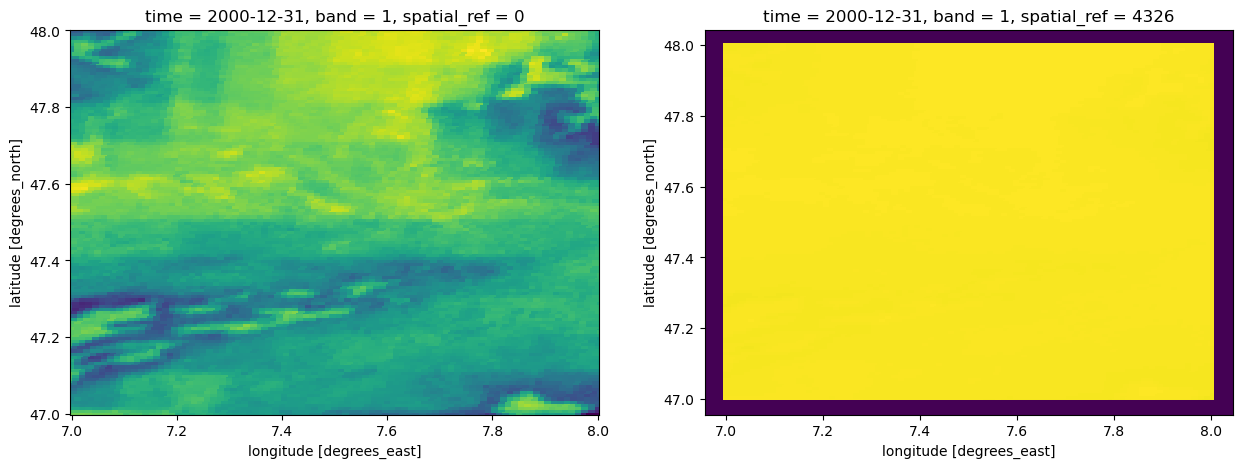

In [101]:
# Reprojecting does decrease size
fix, ax = plt.subplots(1, 2, figsize=(15,5))

MODIS_subset.isel(time=0).squeeze().plot.imshow(ax=ax[0], add_colorbar=False)
MODIS_subset.isel(time=0).odc.reproject(MODIS_subset.odc.geobox.pad(10, 10), resampling = "mode", dst_nodata = "auto").squeeze().plot.imshow(ax=ax[1], add_colorbar=False)

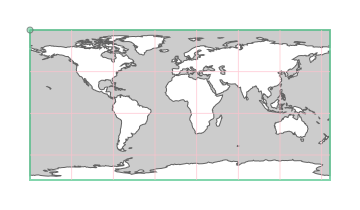

In [47]:
AVHRR_raw["median"].odc.geobox

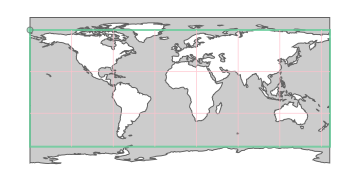

In [54]:
AVHRR.odc.geobox.zoom_to(resolution=0.05)

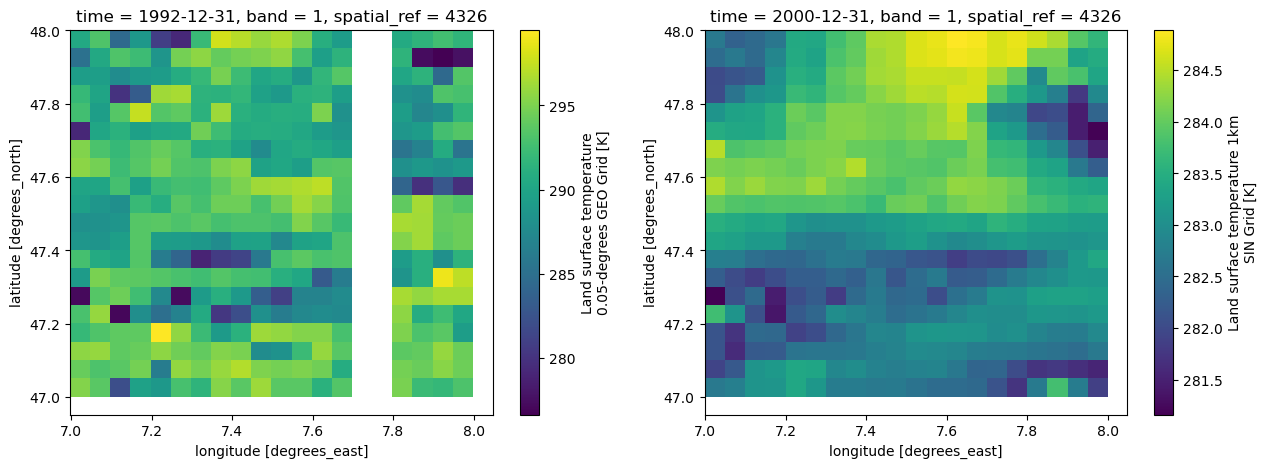

In [56]:
fix, ax = plt.subplots(1, 2, figsize=(15,5))

res = 0.05

AVHRR_subset.isel(time=0).odc.reproject(AVHRR_subset.odc.geobox.zoom_to(resolution=res), resampling = "average", dst_nodata = np.nan).squeeze().plot.imshow(ax=ax[0])
MODIS_subset.isel(time=0).odc.reproject(MODIS_subset.odc.geobox.zoom_to(resolution=res), resampling = "average", dst_nodata = np.nan).squeeze().plot.imshow(ax=ax[1])

In [21]:
geobox = AVHRR.odc.geobox

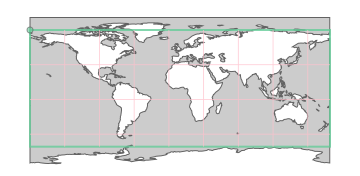

In [25]:
geobox

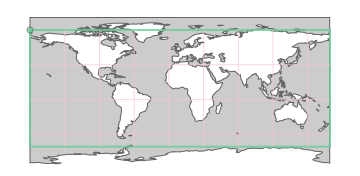

In [ ]:
geobox

---

In [100]:
MODIS_temp = xr.open_zarr(
    "/scicore/home/meiera/schulz0022/projects/growth-and-temperature/data_nobackup/glass/LST/MODIS/Daily/1KM/processed/stage_1/2000/temp_combined.tzarr",
    consolidated=False

)

In [14]:
import pickle
clipped_ds = pickle.load(open("/scicore/home/meiera/schulz0022/projects/growth-and-temperature/data_nobackup/glass/LST/MODIS/Daily/1KM/tmp/test_subset.pkl", "rb"))

In [17]:
test_geobox = pickle.load(open("/scicore/home/meiera/schulz0022/projects/growth-and-temperature/data_nobackup/glass/LST/MODIS/Daily/1KM/tmp/test_geobox.pkl", "rb"))

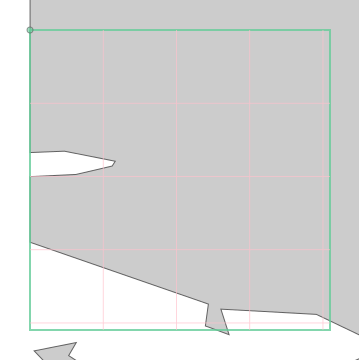

In [25]:
test_geobox

In [51]:
world_map = gpd.read_file("/scicore/home/meiera/schulz0022/projects/growth-and-temperature/data_nobackup/misc/processed/stage_1/gadm/gadm_levelADM_0_simplified.gpkg").simplify(.1, preserve_topology=False)

<Axes: >

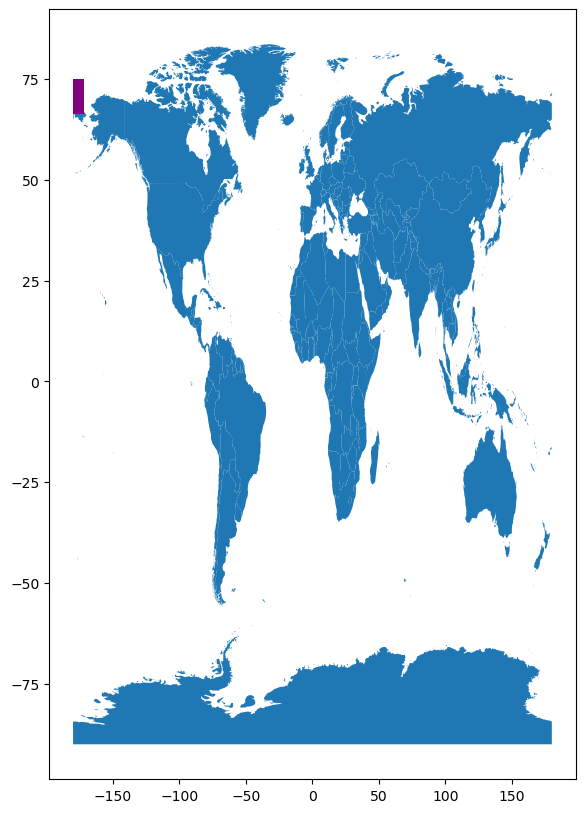

In [70]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10,10))
world_map.plot(ax = ax)
gpd.GeoSeries([test_geobox.extent], crs=4326).plot(ax=ax, color="purple")

In [150]:
clip_lon180(test_geobox.extent).boundingbox

BoundingBox(left=-180.0, bottom=66.46874993175, right=-171.46874993174998, top=75.00208333335, crs=CRS('GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AXIS["Latitude",NORTH],AXIS["Longitude",EAST],AUTHORITY["EPSG","4326"]]'))

<Axes: >

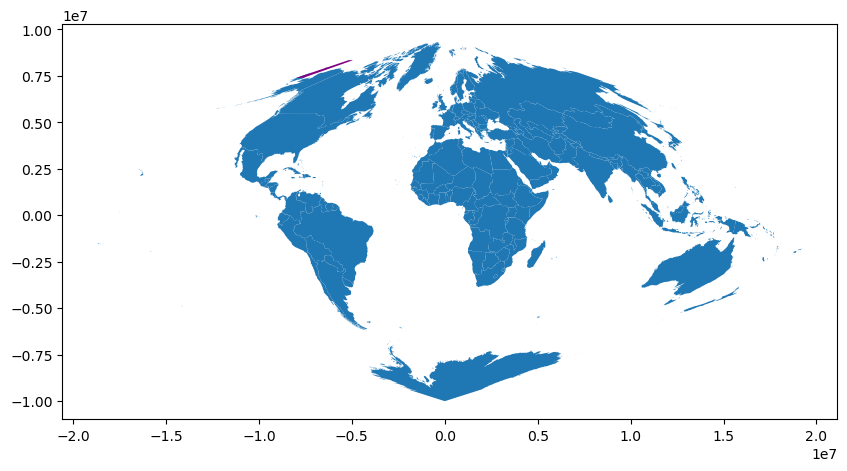

In [146]:
fig, ax = plt.subplots(figsize=(10,10))

world_map.to_crs(clipped_ds.rio.crs).plot(ax = ax)
gpd.GeoSeries([clip_lon180(test_geobox.extent)], crs=4326).to_crs(clipped_ds.rio.crs).plot(ax=ax, color="purple")
#gpd.GeoSeries([box(*(-180, 66.46874993175, -171.46874993174998, 75.00208333335), crs=4326)], crs=4326).to_crs(clipped_ds.rio.crs).plot(ax=ax, color="purple")

In [135]:
from odc.geo.geom import line, chop_along_antimeridian, clip_lon180, box

In [111]:
import shapely
antimeridian = line(
    [
        [MODIS_temp.odc.geobox.boundingbox[0], MODIS_temp.odc.geobox.boundingbox[1]],
        [MODIS_temp.odc.geobox.boundingbox[0], MODIS_temp.odc.geobox.boundingbox[3]]
    ],
    crs = MODIS_temp.rio.crs
)

In [114]:
antimeridian.coords

[(-20015109.353999995, -10007554.677000001),
 (-20015109.353999995, 10007554.677002773)]

In [125]:
clip_lon180()

TypeError: clip_lon180() missing 1 required positional argument: 'geom'

In [ ]:
test_geobox.footprint(clipped_ds.rio.crs)

In [130]:
from odc.geo.geom import Geometry
clip_lon180(test_geobox.footprint(clipped_ds.rio.crs)).exterior.coords

[(180.0, 8339860.554609062),
 (180.0, 8330371.910097811),
 (180.0, 8320883.2655865615),
 (180.0, 8311394.621075313),
 (180.0, 8301905.976564062),
 (180.0, 8292417.332052812),
 (180.0, 8282928.687541561),
 (180.0, 8273440.043030311),
 (180.0, 8263951.398519061),
 (180.0, 8254462.754007811),
 (180.0, 8244974.10949656),
 (180.0, 8235485.46498531),
 (180.0, 8225996.820474059),
 (180.0, 8216508.1759628095),
 (180.0, 8207019.531451559),
 (180.0, 8197530.88694031),
 (180.0, 8188042.24242906),
 (180.0, 8178553.597917809),
 (180.0, 8169064.953406559),
 (180.0, 8159576.3088953085),
 (180.0, 8150087.664384059),
 (180.0, 8140599.01987281),
 (180.0, 8131110.375361559),
 (180.0, 8121621.730850309),
 (180.0, 8112133.086339058),
 (180.0, 8102644.441827807),
 (180.0, 8093155.797316557),
 (180.0, 8083667.152805308),
 (180.0, 8074178.508294057),
 (180.0, 8064689.863782807),
 (180.0, 8055201.2192715565),
 (180.0, 8045712.574760307),
 (180.0, 8036223.930249056),
 (180.0, 8026735.285737807),
 (180.0, 801724

In [112]:
list(test_geobox.footprint(clipped_ds.rio.crs).split(antimeridian))

[]

In [ ]:
gpd.GeoSeries([test_geobox.extent], crs=4326).to_crs(clipped_ds.rio.crs)

AttributeError: 'GeoSeries' object has no attribute 'split'

In [80]:
gpd.GeoSeries([test_geobox.extent], crs=4326).to_crs(clipped_ds.rio.crs).bounds.iloc[0].values

array([-7612275.31098794,  7390996.10348405,  7990923.69668634,
        8339860.55460906])

<Axes: >

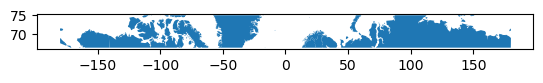

In [83]:
world_map.to_crs(clipped_ds.rio.crs).clip_by_rect(
    *gpd.GeoSeries([test_geobox.extent], crs=4326).to_crs(clipped_ds.rio.crs).bounds.iloc[0].values
).to_crs(4326).plot()

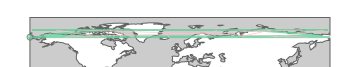

In [16]:
clipped_ds.odc.geobox

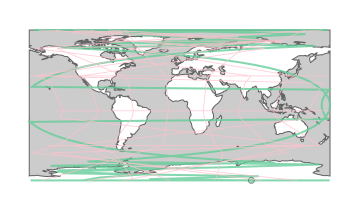

In [13]:
MODIS_temp.odc.geobox

In [11]:
MODIS_temp.isel(x = slice(0, 256*20), y = slice(256 * j, 256 * (j + 1))).compute()

<xarray.Dataset> Size: 81MB
Dimensions:      (time: 1, band: 1, y: 256, x: 5120)
Coordinates:
  * y            (y) float64 2kB -1.001e+07 -1.001e+07 ... -9.772e+06 -9.771e+06
  * x            (x) float64 41kB -2.001e+07 -2.001e+07 ... -1.416e+07
  * time         (time) datetime64[ns] 8B 2000-12-31
    spatial_ref  int64 8B 0
  * band         (band) int64 8B 1
Data variables:
    median       (time, band, y, x) float64 10MB nan nan nan nan ... nan nan nan
    lt0C         (time, band, y, x) uint16 3MB 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0
    gt30C        (time, band, y, x) uint16 3MB 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0
    mean         (time, band, y, x) float64 10MB nan nan nan nan ... nan nan nan
    valid_count  (time, band, y, x) uint16 3MB 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0
    rollmin3     (time, band, y, x) float64 10MB nan nan nan nan ... nan nan nan
    min          (time, band, y, x) float64 10MB nan nan nan nan ... nan nan nan
    rollmax3     (time, band, y, x) float64 10MB nan nan nan nan ... nan nan nan
    max          (time, band, y, x) float64 10MB nan nan nan nan ... nan nan nan
    std          (time, band, y, x) float64 10MB nan nan nan nan ... nan nan nan

In [ ]:
i = 0; j = 0
MODIS_temp.isel(x = slice(256 * i, 256 * (i + 1)), y = slice(256 * j, 256 * (j + 1))).compute()

TypeError: slice indices must be integers or None or have an __index__ method